In [1]:
import pandas as pd

# Load the data
baseline_data = pd.read_csv('baseline_survey_data.csv')
endline_data = pd.read_csv('endline_survey_data.csv')
random_assignment_data = pd.read_csv('random_assignment_data.csv')
# Merge the dataframes
merged_data = baseline_data.merge(endline_data, on='Participant_ID', how='left')
full_merged_data = pd.merge(merged_data, random_assignment_data, on='Participant_ID')
cleaned_data = full_merged_data.dropna()
cleaned_data.head()

,Participant_ID,Age,Gender,Location,Education,Race,Employment_Status,Attitude_Towards_Vaccines,Previous_Vaccine_Status,Vaccinated_After_Baseline,Assigned_Group
0,1,52.0,Female,Nevada,Some college,Hispanic or Latino,Employed,1,No,No,Emotion Ad
1,2,39.0,Male,Texas,Graduate degree,White,Unemployed,3,No,No,Control
3,4,49.0,Male,Texas,Bachelor's degree,Black or African American,Employed,1,No,No,Emotion Ad
4,5,49.0,Male,New York,High school graduate,Asian,Retired,2,No,No,Control
6,7,57.0,Male,New York,Bachelor's degree,Hispanic or Latino,Unemployed,4,Yes,No,Reason Ad


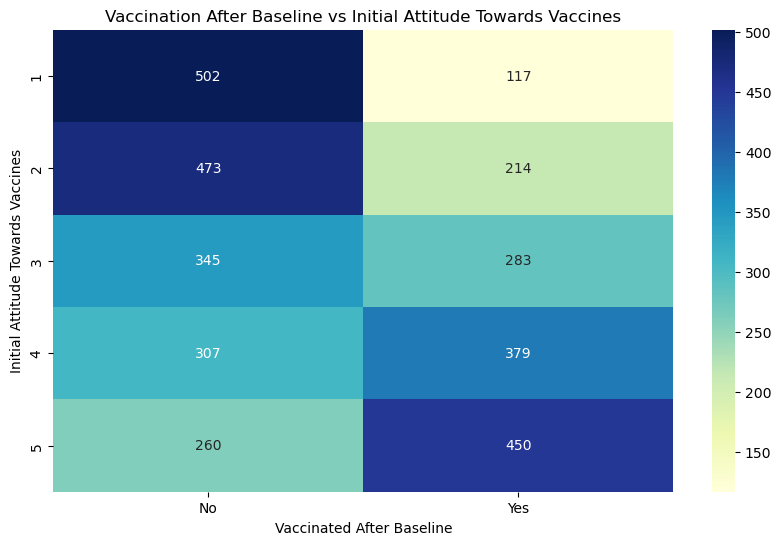

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crosstabulation of attitudes and vaccination status
attitude_vaccination_crosstab = pd.crosstab(cleaned_data['Attitude_Towards_Vaccines'], cleaned_data['Vaccinated_After_Baseline'])

# Assuming the categories in 'Vaccinated_After_Baseline' are 'Yes' and 'No'
vaccinated_categories = ['No', 'Yes']

# Plot with correct category labels
plt.figure(figsize=(10, 6))
sns.heatmap(attitude_vaccination_crosstab, annot=True, fmt="d", cmap="YlGnBu", xticklabels=vaccinated_categories)
plt.title("Vaccination After Baseline vs Initial Attitude Towards Vaccines")
plt.xlabel("Vaccinated After Baseline")
plt.ylabel("Initial Attitude Towards Vaccines")
plt.show()


Correlation Between Attitude and Vaccination

The distribution of responses across different attitude scores can give insights into the general sentiment towards vaccination in the surveyed population.


In [3]:
# Convert 'Vaccinated_After_Baseline' to numeric values: 'Yes' -> 1, 'No' -> 0
cleaned_data['Vaccinated_Numeric'] = cleaned_data['Vaccinated_After_Baseline'].replace({'Yes': 1, 'No': 0})

# Now perform the groupby and aggregation
age_group_analysis = cleaned_data.groupby('Age').agg({'Vaccinated_Numeric': 'mean'})
gender_analysis = cleaned_data.groupby('Gender').agg({'Vaccinated_Numeric': 'mean'})
race_analysis = cleaned_data.groupby('Race').agg({'Vaccinated_Numeric': 'mean'})
employment_status_analysis = cleaned_data.groupby('Employment_Status').agg({'Vaccinated_Numeric': 'mean'})

C:\Users\pc\AppData\Local\Temp/ipykernel_12924/2335044575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Vaccinated_Numeric'] = cleaned_data['Vaccinated_After_Baseline'].replace({'Yes': 1, 'No': 0})


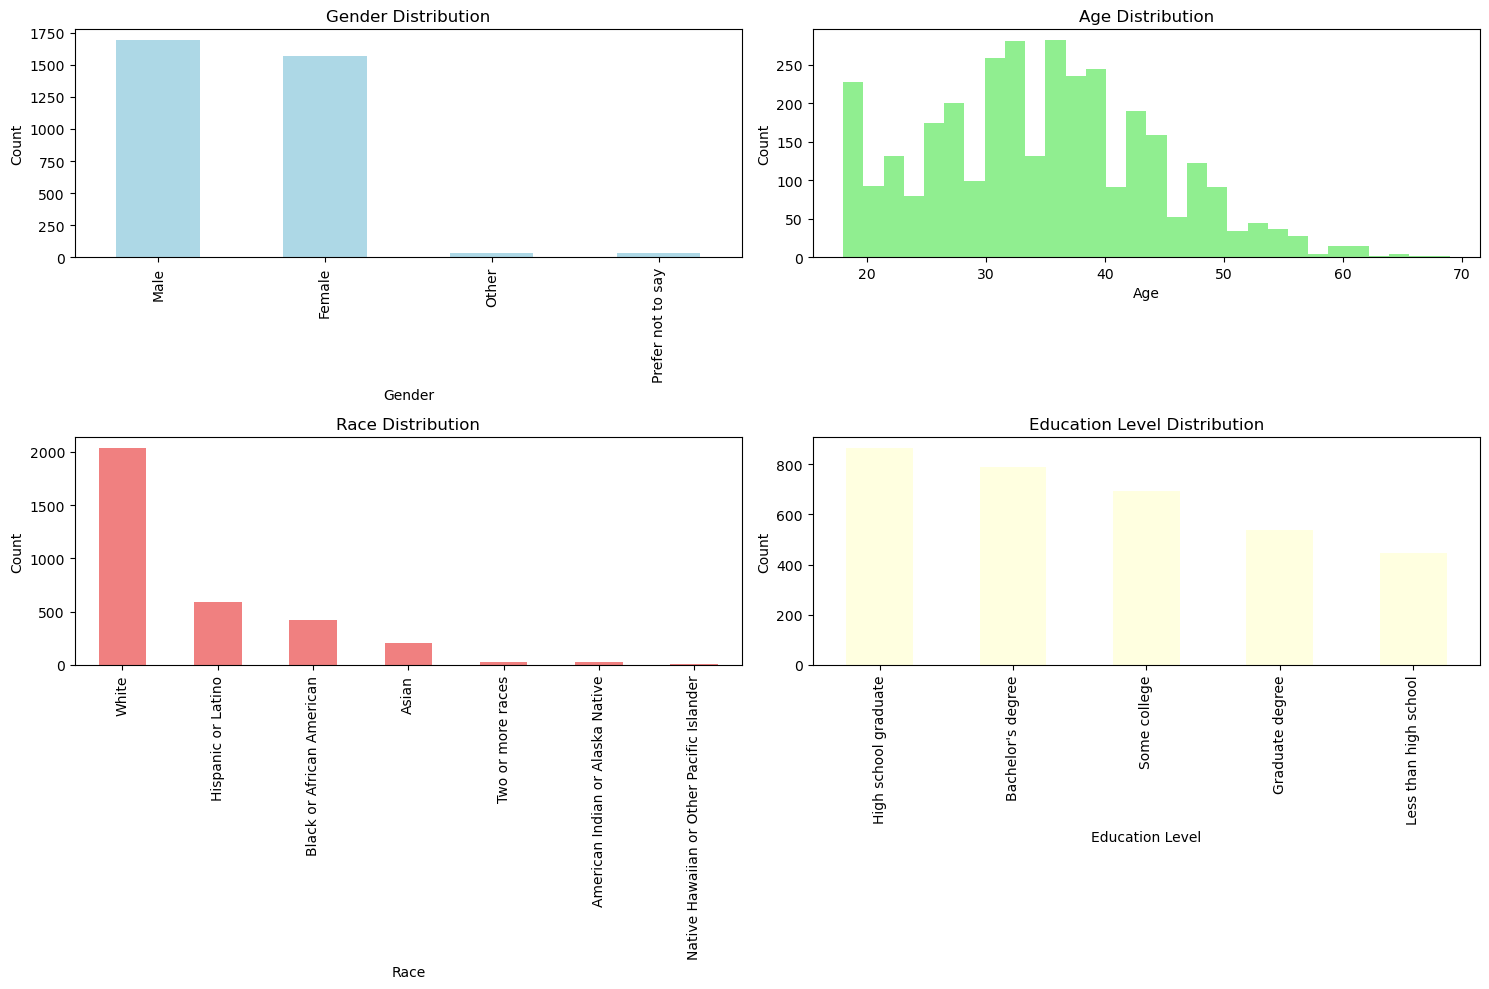

In [4]:
# Visualizing demographic characteristics of the participants without linking to vaccination status

# For demonstration, let's create a few visualizations for different demographic aspects
plt.figure(figsize=(15, 10))

# Gender distribution
plt.subplot(2, 2, 1)
cleaned_data['Gender'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Age distribution
plt.subplot(2, 2, 2)
cleaned_data['Age'].plot(kind='hist', bins=30, color='lightgreen')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Race distribution
plt.subplot(2, 2, 3)
cleaned_data['Race'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')

# Education level distribution
plt.subplot(2, 2, 4)
cleaned_data['Education'].value_counts().plot(kind='bar', color='lightyellow')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


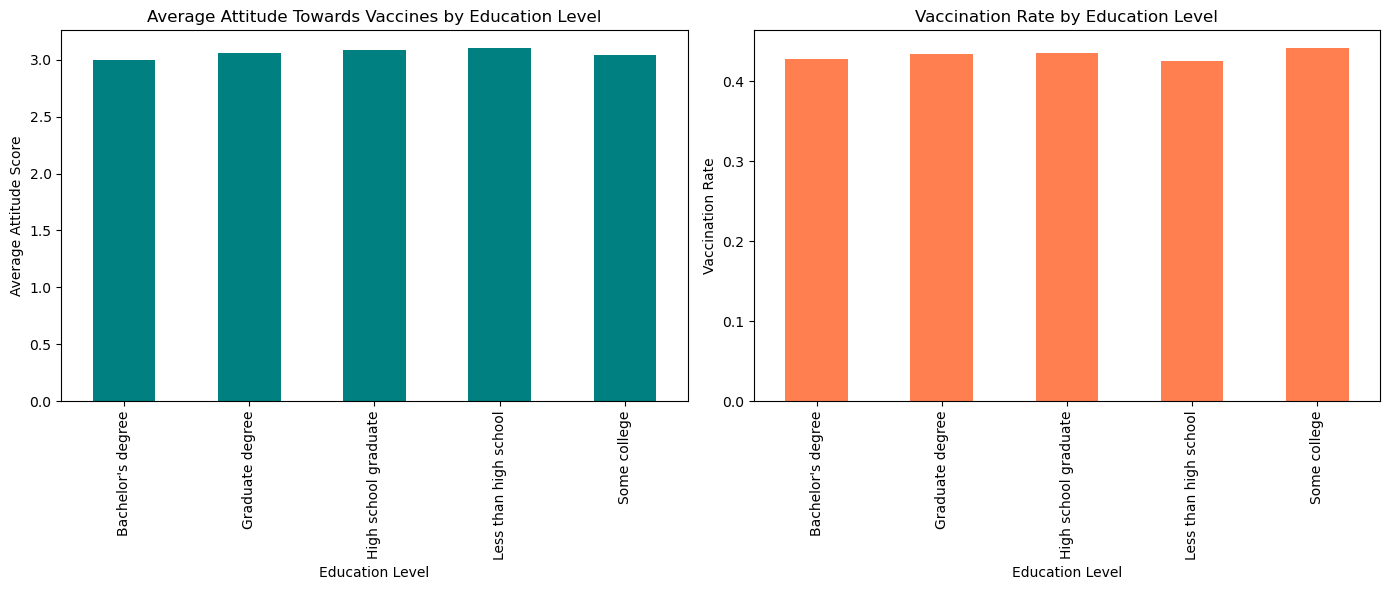

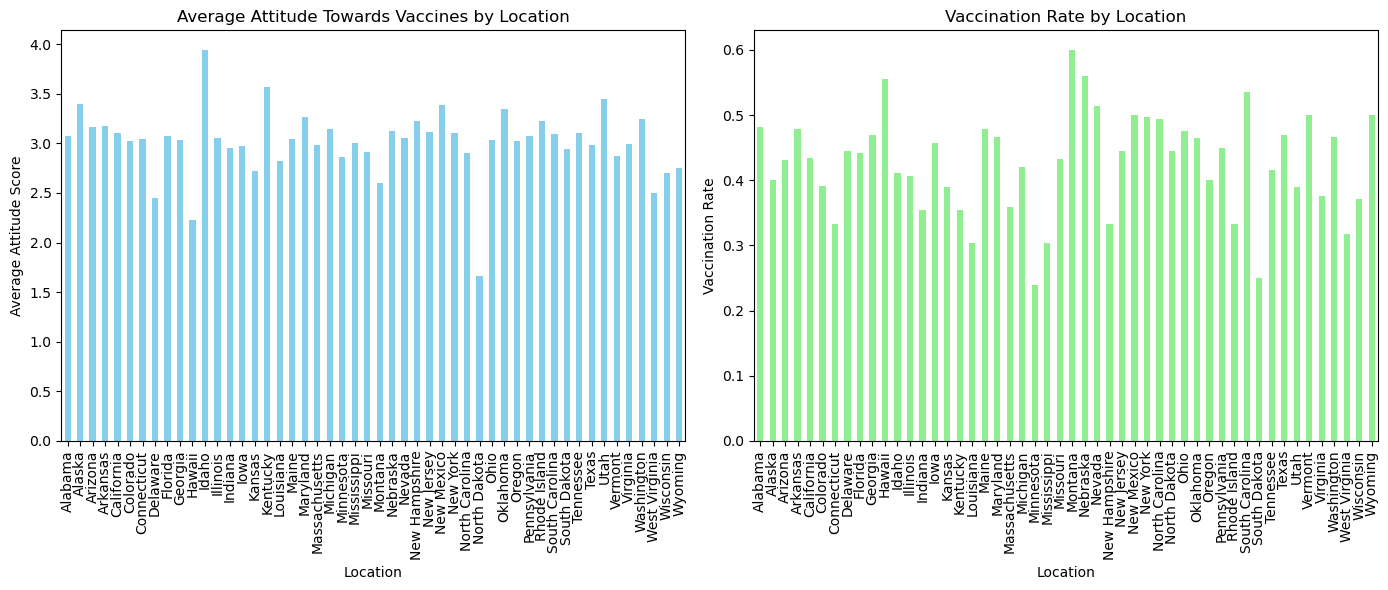

In [5]:
# Step 4: Education Level Impact Analysis
# Group by Education and analyze attitudes and vaccination rates
education_attitudes = cleaned_data.groupby('Education')['Attitude_Towards_Vaccines'].mean()
education_vaccination = cleaned_data['Vaccinated_Numeric'].groupby(cleaned_data['Education']).mean()

# Visualizing the impact of Education Level on Attitudes and Vaccination Decisions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
education_attitudes.plot(kind='bar', color='teal')
plt.title('Average Attitude Towards Vaccines by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Attitude Score')

plt.subplot(1, 2, 2)
education_vaccination.plot(kind='bar', color='coral')
plt.title('Vaccination Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Vaccination Rate')

plt.tight_layout()
plt.show()

# Step 5: Geographical Patterns Analysis
# Group by Location and analyze attitudes and vaccination rates
location_attitudes = cleaned_data.groupby('Location')['Attitude_Towards_Vaccines'].mean()
location_vaccination = cleaned_data['Vaccinated_Numeric'].groupby(cleaned_data['Location']).mean()

# Visualizing geographical patterns in vaccine attitudes and uptake
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
location_attitudes.plot(kind='bar', color='skyblue')
plt.title('Average Attitude Towards Vaccines by Location')
plt.xlabel('Location')
plt.ylabel('Average Attitude Score')

plt.subplot(1, 2, 2)
location_vaccination.plot(kind='bar', color='lightgreen')
plt.title('Vaccination Rate by Location')
plt.xlabel('Location')
plt.ylabel('Vaccination Rate')

plt.tight_layout()
plt.show()


In [6]:
# Baseline Equivalence Check
# We will compare key demographic variables across the groups (if the group data is available)

# Check if 'Assigned_Group' or similar column is in the data for group assignment
group_column_exists = 'Assigned_Group' in merged_data.columns

# If the group assignment data is available, perform the equivalence check
if group_column_exists:
    # Comparing demographics across groups
    group_comparison_age = full_merged_data.groupby('Assigned_Group')['Age'].mean()
    group_comparison_gender = full_merged_data.groupby('Assigned_Group')['Gender'].value_counts(normalize=True)
    group_comparison_education = full_merged_data.groupby('Assigned_Group')['Education'].value_counts(normalize=True)
    group_comparison_race = full_merged_data.groupby('Assigned_Group')['Race'].value_counts(normalize=True)
    group_comparison_attitude = full_merged_data.groupby('Assigned_Group')['Attitude_Towards_Vaccines'].mean()

    # Display the comparison results
    (group_comparison_age, group_comparison_gender, group_comparison_education, group_comparison_race, group_comparison_attitude)
else:
    message = "Group assignment data ('Assigned_Group') is not available in the merged dataset."
    message


In [7]:
# Perform Baseline Equivalence Check by comparing demographics and attitudes across groups
group_comparison_age = full_merged_data.groupby('Assigned_Group')['Age'].mean()
group_comparison_gender = full_merged_data.groupby('Assigned_Group')['Gender'].value_counts(normalize=True)
group_comparison_education = full_merged_data.groupby('Assigned_Group')['Education'].value_counts(normalize=True)
group_comparison_race = full_merged_data.groupby('Assigned_Group')['Race'].value_counts(normalize=True)
group_comparison_attitude = full_merged_data.groupby('Assigned_Group')['Attitude_Towards_Vaccines'].mean()

# Effectiveness Analysis: Compare vaccination rates among the different groups
vaccination_effectiveness = full_merged_data.groupby('Assigned_Group')['Vaccinated_After_Baseline'].value_counts(normalize=True) * 100

# Display the results
(group_comparison_age, group_comparison_gender, group_comparison_education, group_comparison_race, group_comparison_attitude, vaccination_effectiveness)

(Assigned_Group
 Control       34.639651
 Emotion Ad    34.794118
 Reason Ad     34.962653
 Name: Age, dtype: float64,
 Assigned_Group  Gender           
 Control         Female               0.496560
                 Male                 0.486554
                 Prefer not to say    0.010632
                 Other                0.006254
 Emotion Ad      Male                 0.516708
                 Female               0.459777
                 Other                0.012995
                 Prefer not to say    0.010520
 Reason Ad       Male                 0.504798
                 Female               0.478567
                 Other                0.011516
                 Prefer not to say    0.005118
 Name: Gender, dtype: float64,
 Assigned_Group  Education            
 Control         High school graduate     0.276596
                 Bachelor's degree        0.240926
                 Some college             0.189612
                 Graduate degree          0.158949
        

In [8]:
import statsmodels.api as sm

# Remove rows where 'Vaccinated_After_Baseline' is nan
cleaned_data = full_merged_data.dropna()

# Re-convert to ensure only 0s and 1s
cleaned_data['Vaccinated_Numeric'] = cleaned_data['Vaccinated_After_Baseline'].replace({'Yes': 1, 'No': 0})
cleaned_data['Group_Numeric'] = full_merged_data['Assigned_Group'].replace({
    'Control': 0,
    'Emotion Ad': 1,
    'Reason Ad': 2
})

# Re-run the logistic regression with the cleaned data
X_cleaned = cleaned_data[['Group_Numeric']]  # Independent variable
y_cleaned = cleaned_data['Vaccinated_Numeric']  # Dependent variable

X_cleaned = sm.add_constant(X_cleaned)
logit_model_cleaned = sm.Logit(y_cleaned, X_cleaned)
result_cleaned = logit_model_cleaned.fit()

logit_summary_cleaned = result_cleaned.summary2()
logit_summary_cleaned

E:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
E:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Optimization terminated successfully.
         Current function value: 0.684059
         Iterations 4


C:\Users\pc\AppData\Local\Temp/ipykernel_12924/281086733.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Vaccinated_Numeric'] = cleaned_data['Vaccinated_After_Baseline'].replace({'Yes': 1, 'No': 0})
C:\Users\pc\AppData\Local\Temp/ipykernel_12924/281086733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Group_Numeric'] = full_merged_data['Assigned_Group'].replace({
E:\python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit              Pseudo R-squared: 0.000    
Dependent Variable: Vaccinated_Numeric AIC:              4559.8328
Date:               2023-12-08 18:18   BIC:              4572.0543
No. Observations:   3330               Log-Likelihood:   -2277.9  
Df Model:           1                  LL-Null:          -2278.5  
Df Residuals:       3328               LLR p-value:      0.28340  
Converged:          1.0000             Scale:            1.0000   
No. Iterations:     4.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
const          -0.2227    0.0550  -4.0497  0.0001  -0.3304  -0.1149
Group_Numeric  -0.0459    0.0428  -1.0726  0.2835  -0.1298   0.0380
==================================================================

"""

In [9]:
# Example: Analyzing by Gender
gender_effectiveness = cleaned_data.groupby(['Gender', 'Assigned_Group'])['Vaccinated_Numeric'].mean()

# Example: Analyzing by Age Group (creating age groups for analysis)
age_bins = pd.cut(cleaned_data['Age'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90, 100])
age_group_effectiveness = cleaned_data.groupby([age_bins, 'Assigned_Group'])['Vaccinated_Numeric'].mean()

In [10]:
# Sensitivity Analysis
# Testing the robustness of the findings using a different model specification
# Including an interaction term between Age and Assigned Group
cleaned_data['Age_x_Group'] = cleaned_data['Age'] * cleaned_data['Group_Numeric']
X_sensitivity = cleaned_data[['Group_Numeric', 'Age', 'Age_x_Group']]
X_sensitivity = sm.add_constant(X_sensitivity)
logit_model_sensitivity = sm.Logit(cleaned_data['Vaccinated_Numeric'], X_sensitivity)
result_sensitivity = logit_model_sensitivity.fit()

# Display results of subgroup and sensitivity analyses
subgroup_results = (gender_effectiveness, age_group_effectiveness)
sensitivity_summary = result_sensitivity.summary2()
(subgroup_results, sensitivity_summary)

C:\Users\pc\AppData\Local\Temp/ipykernel_12924/3261202336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Age_x_Group'] = cleaned_data['Age'] * cleaned_data['Group_Numeric']
E:\python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.682977
         Iterations 4


((Gender             Assigned_Group
  Female             Control           0.449168
                     Emotion Ad        0.415861
                     Reason Ad         0.439689
  Male               Control           0.434705
                     Emotion Ad        0.454867
                     Reason Ad         0.405975
  Other              Control           0.666667
                     Emotion Ad        0.187500
                     Reason Ad         0.307692
  Prefer not to say  Control           0.642857
                     Emotion Ad        0.250000
                     Reason Ad         0.750000
  Name: Vaccinated_Numeric, dtype: float64,
  Age        Assigned_Group
  (0, 18]    Control           0.469697
             Emotion Ad        0.475410
             Reason Ad         0.535714
  (18, 30]   Control           0.508039
             Emotion Ad        0.430769
             Reason Ad         0.458599
  (30, 40]   Control           0.419565
             Emotion Ad        0.438

Obviously, since it is simulated data, naturally our RCT is completely useless!